In [1]:
%matplotlib widget
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=11
plt.rcParams['axes.grid']=True
plt.rcParams['axes.xmargin']=0

In [7]:
# file_path = '../data/CL_experiments/train/inertia13_ki-0.0061-kp-11.8427/2024-10-16--10-57-42_exp  63.csv'
file_path = '../data/simulated/10_percent/Experiment_2025-01-13_09-03-05.csv'
df = pd.read_csv(file_path)
# Find the first index where r changes from 0 to 1
first_non_zero_index = df.index[df['r'].diff().gt(0)].min()
last_index = df.index[df.t > 20].min()
df = df.loc[first_non_zero_index:last_index]  # Keep rows up to that index

In [8]:
df

,t,theta,omega,r,i_d,i_q,i_q_ref,v_d,v_q
133,1.33,0.615657,1030.602101,2554.996377,0.131577,4.333681,4.800000,-6.296969,23.678650
134,1.34,1.116182,1224.313561,2554.996377,0.202645,4.201247,4.800000,-9.790018,30.303832
135,1.35,1.702232,1415.890946,2554.996377,0.237280,4.139913,4.800000,-11.467305,33.374439
136,1.36,2.373099,1606.941140,2554.996377,0.230612,4.176614,4.800000,-11.168916,31.543595
137,1.37,3.128256,1796.315744,2554.996377,0.222382,4.067203,4.800000,-10.713987,37.018577
...,...,...,...,...,...,...,...,...,...
996,9.96,3.770321,2776.260275,2805.020411,0.059447,-0.274648,0.634790,-2.993743,48.000000
997,9.97,5.002458,2776.695733,2805.020411,0.042965,-0.412583,0.636863,-2.167568,48.000000
998,9.98,6.234799,2776.857311,2805.020411,-0.075566,-0.396579,0.635503,3.561880,48.000000
999,9.99,1.184088,2777.277071,2805.020411,-0.103297,-0.266088,0.634580,5.040893,47.830134


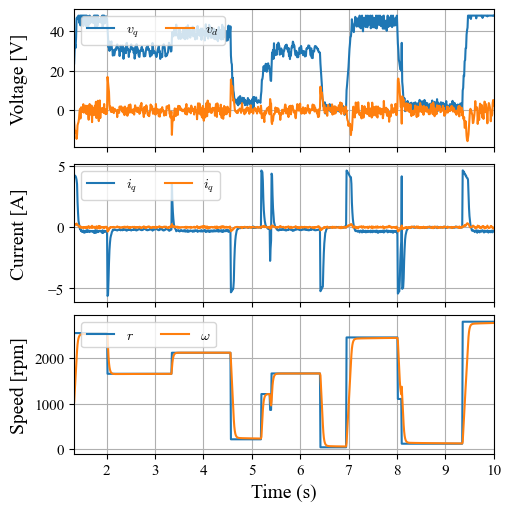

In [9]:
# Create the figure and subplots with shared x-axis
fig, axes = plt.subplots(3, 1, figsize=(5, 5), sharex=True, constrained_layout=True)

axes[0].plot(df.t, df.v_q, label='$v_q$')
axes[0].plot(df.t, df.v_d, label='$v_d$')
axes[0].set_ylabel('Voltage [V]')
axes[0].legend(ncols=2)


axes[1].plot(df.t, df.i_q, label='$i_q$')
axes[1].plot(df.t, df.i_d, label='$i_q$')
axes[1].set_ylabel('Current [A]')
axes[1].legend(ncols=2)

axes[2].plot(df.t, df.r, label='$r$')
axes[2].plot(df.t, df.omega, label=r'$\omega$')
axes[2].set_ylabel('Speed [rpm]')
axes[2].legend(ncols=2)

# Set the x-label for the last subplot
axes[-1].set_xlabel('Time (s)')
# Align the y-axis labels to the left
for ax in axes:
    ax.yaxis.set_label_coords(-0.11, 0.5)  # Adjust -0.1 based on figure width
    ax.legend(loc='upper left', ncol=2)

# Tight layout for better spacing
# plt.xlim([9, 12])
# plt.savefig('experiment.pdf')
plt.show()

In [89]:
import torch